Generation 1: Best Fitness = 0.6431
Generation 2: Best Fitness = 0.6452
Generation 3: Best Fitness = 0.6452
Generation 4: Best Fitness = 0.6458
Generation 5: Best Fitness = 0.6475
Generation 6: Best Fitness = 0.6475
Generation 7: Best Fitness = 0.6475
Generation 8: Best Fitness = 0.6475
Generation 9: Best Fitness = 0.6523
Generation 10: Best Fitness = 0.6523
Generation 11: Best Fitness = 0.6523
Generation 12: Best Fitness = 0.6523
Generation 13: Best Fitness = 0.6529
Generation 14: Best Fitness = 0.6540
Generation 15: Best Fitness = 0.6540
Generation 16: Best Fitness = 0.6540
Generation 17: Best Fitness = 0.6540
Generation 18: Best Fitness = 0.6540
Generation 19: Best Fitness = 0.6540
Generation 20: Best Fitness = 0.6540


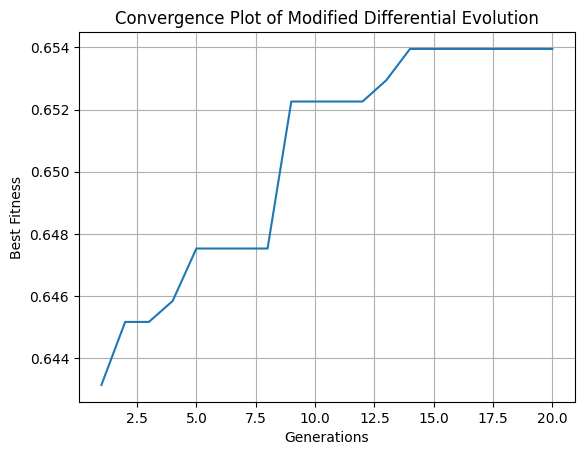

Selected Features Saved!


In [ ]:
import numpy as np
import random
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Parameters for MDE
POPULATION_SIZE = 30
NUM_GENERATIONS = 20
MUTATION_FACTOR = 0.8
CROSSOVER_RATE = 0.7
MAX_NO_IMPROVEMENT = 10
INITIAL_NOISE = 0.1  # Initial noise for poor individuals

# Initialize population
def initialize_population(feature_dim, population_size):
    return np.random.randint(2, size=(population_size, feature_dim))

# Fitness function
def fitness_function(individual, X, y, classifier):
    selected_features = np.where(individual == 1)[0]
    if len(selected_features) == 0:
        return 0
    selected_X = X[:, selected_features]
    scores = cross_val_score(classifier, selected_X, y, cv=5)
    return scores.mean()

# Mutation strategies
def mutation_worst(individual, population, best, mutation_factor):
    a, b, c = random.sample(list(population), 3)
    z = best + mutation_factor * (b - c)
    z = np.clip(z, 0, 1)
    return np.where(np.random.rand(len(z)) > 0.5, z, individual)


def mutation_sub_worst(individual, population, best, mutation_factor):
    a, b, c = random.sample(list(population), 3)
    y = best + mutation_factor * (b - c)
    noise = np.random.normal(0, INITIAL_NOISE, size=len(y))  # Adding noise
    y = np.clip(y + noise, 0, 1)
    child = np.zeros_like(individual)
    for j in range(len(individual)):
        if np.random.rand() < CROSSOVER_RATE:
            child[j] = y[j]
        else:
            child[j] = individual[j]
    return child


def mutation_poor(individual, population, best, mutation_factor):
    a, b, c, d, e = random.sample(list(population), 5)
    y = best + mutation_factor * (b - c) + mutation_factor * (d - e)
    noise = np.random.normal(0, INITIAL_NOISE, size=len(y))  # Adding noise
    y = np.clip(y + noise, 0, 1)
    child = np.zeros_like(individual)
    for j in range(len(individual)):
        if np.random.rand() > 0.75:
            child[j] = best[j]
        else:
            child[j] = np.random.choice([b[j], c[j], d[j], e[j]])
    return child

# Jumping method
def jumping_method(population, best_individual, no_improvement_iter):
    if no_improvement_iter >= MAX_NO_IMPROVEMENT:
        for i in range(len(population)):
            if random.random() < 0.5:
                population[i] = 1 - population[i]
    return population

# MDE implementation
def modified_differential_evolution(X, y, classifier, num_generations, population_size):
    feature_dim = X.shape[1]
    population = initialize_population(feature_dim, population_size)
    best_individual = None
    best_fitness = -1
    no_improvement_iter = 0
    best_fitness_per_generation = []

    for generation in range(num_generations):
        fitness_values = [fitness_function(ind, X, y, classifier) for ind in population]
        sorted_indices = np.argsort(fitness_values)[::-1]
        population = population[sorted_indices]
        fitness_values = np.array(fitness_values)[sorted_indices]

        if fitness_values[0] > best_fitness:
            best_fitness = fitness_values[0]
            best_individual = population[0]
            no_improvement_iter = 0
        else:
            no_improvement_iter += 1

        best_fitness_per_generation.append(best_fitness)

        # Apply mutation strategies
        for i in range(population_size):
            if i < population_size // 6:
                continue
            elif i < population_size * 2 // 6:
                population[i] = mutation_worst(population[i], population, best_individual, MUTATION_FACTOR)
            elif i < population_size * 4 // 6:
                population[i] = mutation_sub_worst(population[i], population, best_individual, MUTATION_FACTOR)
            else:
                population[i] = mutation_poor(population[i], population, best_individual, MUTATION_FACTOR)

        population = jumping_method(population, best_individual, no_improvement_iter)

        print(f"Generation {generation + 1}: Best Fitness = {best_fitness:.4f}")

    plt.plot(range(1, num_generations + 1), best_fitness_per_generation)
    plt.xlabel('Generations')
    plt.ylabel('Best Fitness')
    plt.title('Convergence Plot of Modified Differential Evolution')
    plt.grid(True)
    plt.show()

    return best_individual

# Main function
if __name__ == "__main__":
    X = np.load('features2.npy')
    y = np.load('emotions2.npy')

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    best_features = modified_differential_evolution(X, y, classifier, NUM_GENERATIONS, POPULATION_SIZE)

    np.save('selected_features.npy', best_features)
    print("Selected Features Saved!")


Generation 1: Best Fitness = 0.6317
Generation 2: Best Fitness = 0.6357
Generation 3: Best Fitness = 0.6401
Generation 4: Best Fitness = 0.6401
Generation 5: Best Fitness = 0.6401
Generation 6: Best Fitness = 0.6435
Generation 7: Best Fitness = 0.6435
Generation 8: Best Fitness = 0.6435
Generation 9: Best Fitness = 0.6435
Generation 10: Best Fitness = 0.6435
Generation 11: Best Fitness = 0.6435
Generation 12: Best Fitness = 0.6435
Generation 13: Best Fitness = 0.6435
Generation 14: Best Fitness = 0.6435
Generation 15: Best Fitness = 0.6435
Generation 16: Best Fitness = 0.6435
Generation 17: Best Fitness = 0.6435
Generation 18: Best Fitness = 0.6435
Generation 19: Best Fitness = 0.6435
Generation 20: Best Fitness = 0.6435


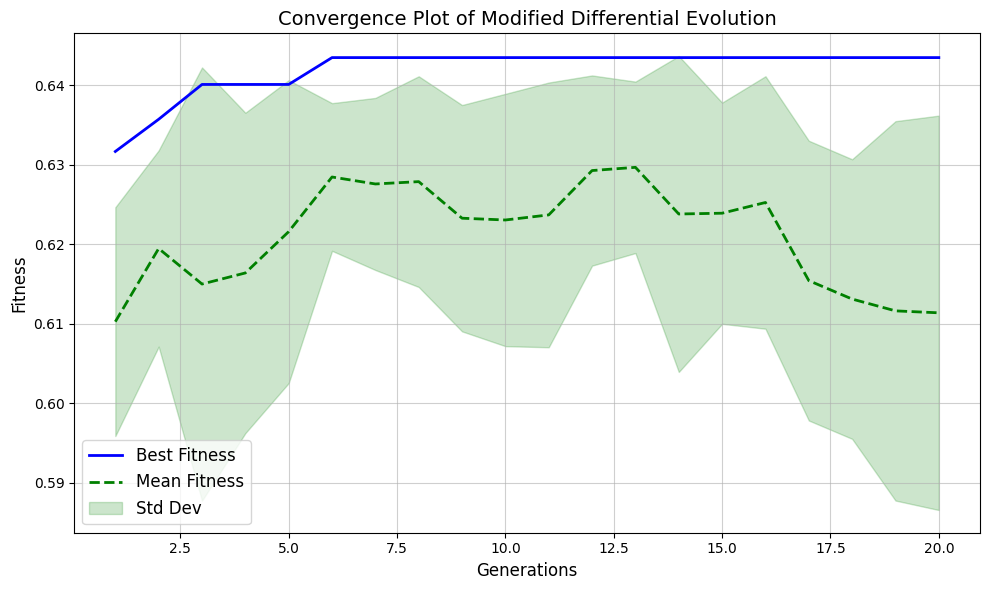

In [ ]:
import numpy as np
import random
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Parameters for MDE
POPULATION_SIZE = 30
NUM_GENERATIONS = 20
MUTATION_FACTOR = 0.8
CROSSOVER_RATE = 0.7
MAX_NO_IMPROVEMENT = 10
INITIAL_NOISE = 0.1  # Initial noise for poor individuals

# Initialize population
def initialize_population(feature_dim, population_size):
    return np.random.randint(2, size=(population_size, feature_dim))

# Fitness function
def fitness_function(individual, X, y, classifier):
    selected_features = np.where(individual == 1)[0]
    if len(selected_features) == 0:
        return 0
    selected_X = X[:, selected_features]
    scores = cross_val_score(classifier, selected_X, y, cv=5)
    return scores.mean()

# Mutation strategies
def mutation_worst(individual, population, best, mutation_factor):
    a, b, c = random.sample(list(population), 3)
    z = best + mutation_factor * (b - c)
    z = np.clip(z, 0, 1)
    return np.where(np.random.rand(len(z)) > 0.5, z, individual)

def mutation_sub_worst(individual, population, best, mutation_factor):
    a, b, c = random.sample(list(population), 3)
    y = best + mutation_factor * (b - c)
    noise = np.random.normal(0, INITIAL_NOISE, size=len(y))  # Adding noise
    y = np.clip(y + noise, 0, 1)
    child = np.zeros_like(individual)
    for j in range(len(individual)):
        if np.random.rand() < CROSSOVER_RATE:
            child[j] = y[j]
        else:
            child[j] = individual[j]
    return child

def mutation_poor(individual, population, best, mutation_factor):
    a, b, c, d, e = random.sample(list(population), 5)
    y = best + mutation_factor * (b - c) + mutation_factor * (d - e)
    noise = np.random.normal(0, INITIAL_NOISE, size=len(y))  # Adding noise
    y = np.clip(y + noise, 0, 1)
    child = np.zeros_like(individual)
    for j in range(len(individual)):
        if np.random.rand() > 0.75:
            child[j] = best[j]
        else:
            child[j] = np.random.choice([b[j], c[j], d[j], e[j]])
    return child

# Jumping method
def jumping_method(population, best_individual, no_improvement_iter):
    if no_improvement_iter >= MAX_NO_IMPROVEMENT:
        for i in range(len(population)):
            if random.random() < 0.5:
                population[i] = 1 - population[i]
    return population

# MDE implementation
def modified_differential_evolution(X, y, classifier, num_generations, population_size):
    feature_dim = X.shape[1]
    population = initialize_population(feature_dim, population_size)
    best_individual = None
    best_fitness = -1
    no_improvement_iter = 0
    best_fitness_per_generation = []
    mean_fitness_per_generation = []
    variance_fitness_per_generation = []

    for generation in range(num_generations):
        fitness_values = [fitness_function(ind, X, y, classifier) for ind in population]
        sorted_indices = np.argsort(fitness_values)[::-1]
        population = population[sorted_indices]
        fitness_values = np.array(fitness_values)[sorted_indices]

        if fitness_values[0] > best_fitness:
            best_fitness = fitness_values[0]
            best_individual = population[0]
            no_improvement_iter = 0
        else:
            no_improvement_iter += 1

        best_fitness_per_generation.append(best_fitness)
        mean_fitness_per_generation.append(np.mean(fitness_values))
        variance_fitness_per_generation.append(np.var(fitness_values))

        # Apply mutation strategies
        for i in range(population_size):
            if i < population_size // 6:
                continue
            elif i < population_size * 2 // 6:
                population[i] = mutation_worst(population[i], population, best_individual, MUTATION_FACTOR)
            elif i < population_size * 4 // 6:
                population[i] = mutation_sub_worst(population[i], population, best_individual, MUTATION_FACTOR)
            else:
                population[i] = mutation_poor(population[i], population, best_individual, MUTATION_FACTOR)

        population = jumping_method(population, best_individual, no_improvement_iter)

        print(f"Generation {generation + 1}: Best Fitness = {best_fitness:.4f}")

    # Plot results
    plt.figure(figsize=(10, 6))
    generations = range(1, num_generations + 1)
    plt.plot(generations, best_fitness_per_generation, label='Best Fitness', color='blue', linewidth=2)
    plt.plot(generations, mean_fitness_per_generation, label='Mean Fitness', color='green', linestyle='--', linewidth=2)
    plt.fill_between(generations,
                     np.array(mean_fitness_per_generation) - np.sqrt(variance_fitness_per_generation),
                     np.array(mean_fitness_per_generation) + np.sqrt(variance_fitness_per_generation),
                     color='green', alpha=0.2, label='Std Dev')

    plt.xlabel('Generations', fontsize=12)
    plt.ylabel('Fitness', fontsize=12)
    plt.title('Convergence Plot of Modified Differential Evolution', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.6)

    # Optional: Log scale for Y-axis if needed
    if max(best_fitness_per_generation) / min(best_fitness_per_generation) > 10:
        plt.yscale('log')

    plt.tight_layout()
    plt.show()

    return best_individual

# Main function
if __name__ == "__main__":
    X = np.load('features2.npy')
    y = np.load('emotions2.npy')

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    best_features = modified_differential_evolution(X, y, classifier, NUM_GENERATIONS, POPULATION_SIZE)

    np.save('selected_features.npy', best_features)
    print("Selected Features Saved!")


Generation 1: Best Fitness = 0.6398
Generation 2: Best Fitness = 0.6398
Generation 3: Best Fitness = 0.6448
Generation 4: Best Fitness = 0.6448
Generation 5: Best Fitness = 0.6448
Generation 6: Best Fitness = 0.6448
Generation 7: Best Fitness = 0.6448
Generation 8: Best Fitness = 0.6448
Generation 9: Best Fitness = 0.6448
Generation 10: Best Fitness = 0.6448
Generation 11: Best Fitness = 0.6448
Generation 12: Best Fitness = 0.6448
Generation 13: Best Fitness = 0.6448
Generation 14: Best Fitness = 0.6448
Generation 15: Best Fitness = 0.6448
Generation 16: Best Fitness = 0.6448
Generation 17: Best Fitness = 0.6448
Generation 18: Best Fitness = 0.6448
Generation 19: Best Fitness = 0.6448
Generation 20: Best Fitness = 0.6448


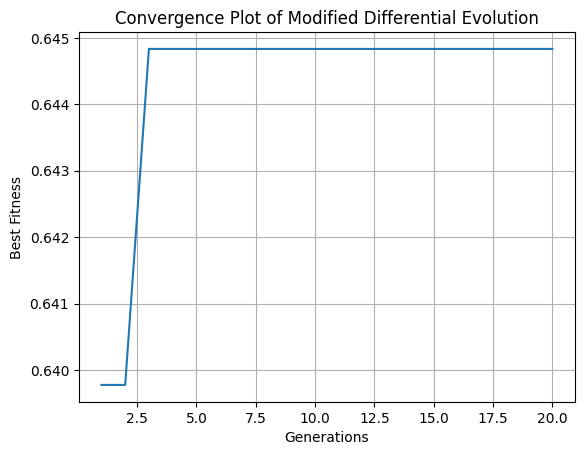

Selected Features Saved!


In [ ]:
import numpy as np
import random
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Parameters for MDE
POPULATION_SIZE = 30
NUM_GENERATIONS = 20
MUTATION_FACTOR = 0.8
CROSSOVER_RATE = 0.7
MAX_NO_IMPROVEMENT = 10  # Number of generations without improvement

# Initialize population
def initialize_population(feature_dim, population_size):
    return np.random.randint(2, size=(population_size, feature_dim))

# Fitness function
def fitness_function(individual, X, y, classifier):
    selected_features = np.where(individual == 1)[0]
    if len(selected_features) == 0:
        return 0  # Avoid empty feature sets
    selected_X = X[:, selected_features]
    scores = cross_val_score(classifier, selected_X, y, cv=5)
    return scores.mean()

# Mutation strategies
def mutation_worst(individual, population, best, mutation_factor):
    a, b, c = random.sample(list(population), 3)
    z = best + mutation_factor * (b - c)
    z = np.clip(z, 0, 1)
    return np.where(np.random.rand(len(z)) > 0.5, z, individual)

def mutation_sub_worst(individual, population, best, mutation_factor):
    a, b, c = random.sample(list(population), 3)
    y = best + mutation_factor * (b - c)
    child = np.zeros_like(individual)
    for j in range(len(individual)):
        if np.random.rand() < CROSSOVER_RATE:
            child[j] = y[j]
        else:
            child[j] = individual[j]
    return child

def mutation_poor(individual, population, best, mutation_factor):
    a, b, c, d, e = random.sample(list(population), 5)
    y = best + mutation_factor * (b - c) + mutation_factor * (d - e)
    child = np.zeros_like(individual)
    for j in range(len(individual)):
        if np.random.rand() > 0.75:
            child[j] = best[j]
        else:
            child[j] = np.random.choice([b[j], c[j], d[j], e[j]])
    return child

# Jumping method
def jumping_method(population, best_individual, no_improvement_iter):
    if no_improvement_iter >= MAX_NO_IMPROVEMENT:
        for i in range(len(population)):
            if random.random() < 0.5:
                population[i] = 1 - population[i]  # Flip bits randomly
    return population

# MDE implementation
import matplotlib.pyplot as plt

def modified_differential_evolution(X, y, classifier, num_generations, population_size):
    feature_dim = X.shape[1]
    population = initialize_population(feature_dim, population_size)
    best_individual = None
    best_fitness = -1
    no_improvement_iter = 0
    best_fitness_per_generation = []  # لیستی برای ذخیره بهترین دقت در هر نسل

    for generation in range(num_generations):
        # Evaluate fitness and sort individuals
        fitness_values = [fitness_function(ind, X, y, classifier) for ind in population]
        sorted_indices = np.argsort(fitness_values)[::-1]
        population = population[sorted_indices]
        fitness_values = np.array(fitness_values)[sorted_indices]

        if fitness_values[0] > best_fitness:
            best_fitness = fitness_values[0]
            best_individual = population[0]
            no_improvement_iter = 0
        else:
            no_improvement_iter += 1

        best_fitness_per_generation.append(best_fitness)  # ذخیره بهترین دقت در هر نسل

        # Apply mutation strategies
        for i in range(population_size):
            if i < population_size // 6:  # Best individuals remain unchanged
                continue
            elif i < population_size * 2 // 6:  # Worst individuals
                population[i] = mutation_worst(population[i], population, best_individual, MUTATION_FACTOR)
            elif i < population_size * 4 // 6:  # Sub-worst individuals
                population[i] = mutation_sub_worst(population[i], population, best_individual, MUTATION_FACTOR)
            else:  # Poor individuals
                population[i] = mutation_poor(population[i], population, best_individual, MUTATION_FACTOR)

        # Apply jumping method
        population = jumping_method(population, best_individual, no_improvement_iter)

        print(f"Generation {generation + 1}: Best Fitness = {best_fitness:.4f}")

    # رسم نمودار همگرایی
    plt.plot(range(1, num_generations + 1), best_fitness_per_generation)
    plt.xlabel('Generations')
    plt.ylabel('Best Fitness')
    plt.title('Convergence Plot of Modified Differential Evolution')
    plt.grid(True)
    plt.show()

    return best_individual

# Main function
if __name__ == "__main__":
    # Load dataset
    X = np.load('features2.npy')
    y = np.load('emotions2.npy')

    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Define classifier
    classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Run MDE
    best_features = modified_differential_evolution(X, y, classifier, NUM_GENERATIONS, POPULATION_SIZE)

    # Save selected features
    np.save('selected_features.npy', best_features)
    print("Selected Features Saved!")


In [ ]:
#ژنتیک

In [ ]:
import numpy as np
import random
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Parameters for GA
POPULATION_SIZE = 30
NUM_GENERATIONS = 20
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.7
TOURNAMENT_SIZE = 3
MUTATION_PROBABILITY = 0.1

# Initialize population
def initialize_population(feature_dim, population_size):
    return np.random.randint(2, size=(population_size, feature_dim))

# Fitness function
def fitness_function(individual, X, y, classifier):
    selected_features = np.where(individual == 1)[0]
    if len(selected_features) == 0:
        return 0
    selected_X = X[:, selected_features]
    scores = cross_val_score(classifier, selected_X, y, cv=5)
    return scores.mean()

# Tournament selection
def tournament_selection(population, fitness_values, tournament_size):
    selected = random.sample(list(zip(population, fitness_values)), tournament_size)
    selected = sorted(selected, key=lambda x: x[1], reverse=True)
    return selected[0][0]

# Crossover operation
def crossover(parent1, parent2, crossover_rate):
    child = np.copy(parent1)
    for i in range(len(parent1)):
        if np.random.rand() < crossover_rate:
            child[i] = parent2[i]
    return child

# Mutation operation
def mutation(individual, mutation_rate):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = 1 - individual[i]  # Flip bit
    return individual

# GA implementation
def genetic_algorithm(X, y, classifier, num_generations, population_size):
    feature_dim = X.shape[1]
    population = initialize_population(feature_dim, population_size)
    best_individual = None
    best_fitness = -1
    best_fitness_per_generation = []

    for generation in range(num_generations):
        fitness_values = [fitness_function(ind, X, y, classifier) for ind in population]
        sorted_indices = np.argsort(fitness_values)[::-1]
        population = np.array(population)[sorted_indices]
        fitness_values = np.array(fitness_values)[sorted_indices]

        if fitness_values[0] > best_fitness:
            best_fitness = fitness_values[0]
            best_individual = population[0]

        best_fitness_per_generation.append(best_fitness)

        # Create next generation
        new_population = []
        while len(new_population) < population_size:
            parent1 = tournament_selection(population, fitness_values, TOURNAMENT_SIZE)
            parent2 = tournament_selection(population, fitness_values, TOURNAMENT_SIZE)
            child = crossover(parent1, parent2, CROSSOVER_RATE)
            child = mutation(child, MUTATION_PROBABILITY)
            new_population.append(child)

        population = new_population
        print(f"Generation {generation + 1}: Best Fitness = {best_fitness:.4f}")

    # Plot results
    plt.plot(range(1, num_generations + 1), best_fitness_per_generation, label="Best Fitness")
    plt.xlabel("Generations")
    plt.ylabel("Fitness")
    plt.title("Convergence of Genetic Algorithm")
    plt.legend()
    plt.show()

    return best_individual

# Main function
if __name__ == "__main__":
    X = np.load('features3.npy')
    y = np.load('emotions3.npy')

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    best_features = genetic_algorithm(X, y, classifier, NUM_GENERATIONS, POPULATION_SIZE)

    np.save('selected_features_ga.npy', best_features)
    print("Selected Features Saved!")


Generation 1: Best Fitness = 0.6593
Generation 2: Best Fitness = 0.6654
Generation 3: Best Fitness = 0.6654
Generation 4: Best Fitness = 0.6701
Generation 5: Best Fitness = 0.6701
Generation 6: Best Fitness = 0.6725
Generation 7: Best Fitness = 0.6736
Generation 8: Best Fitness = 0.6757
Generation 9: Best Fitness = 0.6757
Generation 10: Best Fitness = 0.6757
Generation 11: Best Fitness = 0.6757
Generation 12: Best Fitness = 0.6757
Generation 13: Best Fitness = 0.6757


In [ ]:

selected_features_data = X[:, best_features == 1]


np.save('selected_features_data22.npy', selected_features_data)

print("Selected features saved to 'selected_features_data.npy'")


Selected features saved to 'selected_features_data.npy'


In [ ]:

loaded_data = np.load('/content/selected_features_data22.npy')
print(loaded_data.shape)


(4641, 43)


Feature ranking:
1. Feature 2 - Importance: 0.07450316210658485
2. Feature 24 - Importance: 0.07079637118977004
3. Feature 3 - Importance: 0.060691002716927206
4. Feature 36 - Importance: 0.039317762922165815
5. Feature 23 - Importance: 0.03522997080206425
6. Feature 1 - Importance: 0.025711706042568973
7. Feature 5 - Importance: 0.023990670400983096
8. Feature 25 - Importance: 0.02263171942690317
9. Feature 0 - Importance: 0.02131398540173736
10. Feature 4 - Importance: 0.02069328580424297
11. Feature 34 - Importance: 0.02008259515900583
12. Feature 43 - Importance: 0.020051284439067327
13. Feature 42 - Importance: 0.019547413371283028
14. Feature 6 - Importance: 0.017772059304662493
15. Feature 7 - Importance: 0.01638344708295362
16. Feature 49 - Importance: 0.016070977997812427
17. Feature 32 - Importance: 0.016004306256550214
18. Feature 33 - Importance: 0.015645963987987618
19. Feature 10 - Importance: 0.015631905898272427
20. Feature 11 - Importance: 0.015405722252700822
21. Feat

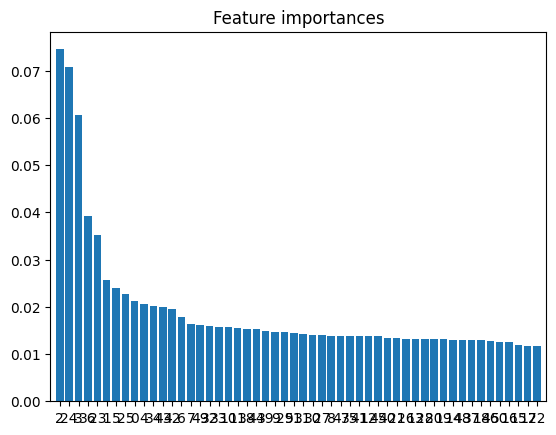

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X_speech = np.load('selected_features_data.npy')
y = np.load('emotions2.npy')


rf = RandomForestClassifier(random_state=42)
rf.fit(X_speech, y)


importances = rf.feature_importances_


indices = np.argsort(importances)[::-1]


print("Feature ranking:")
for f in range(X_speech.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} - Importance: {importances[indices[f]]}")

import matplotlib.pyplot as plt

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_speech.shape[1]), importances[indices], align="center")
plt.xticks(range(X_speech.shape[1]), indices)
plt.xlim([-1, X_speech.shape[1]])
plt.show()


In [ ]:

seed_value = 42
import os

os.environ['PYTHONHASHSEED'] = str(seed_value)
import random
np.random.seed(seed_value)
import tensorflow as tf


tf.random.set_seed(seed_value)

import sys
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import keras
from sklearn.metrics import recall_score
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import pad_sequences


import os
import pickle
import numpy as np
from keras import Input, Model, layers, Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense, Bidirectional, Conv1D, MaxPooling1D, Flatten, \
    BatchNormalization, Concatenate, Layer, Reshape, Conv2D, MaxPool2D, SpatialDropout1D
# from keras.utils.vis_utils import plot_model
# from training_strategies import cold_start, pre_trained, warm_start, late_fusion, LinearW, attention
# from plots import plot_confusion_matrix, plot_history

emo_codes = {"A": 0, "W": 1, "H": 2, "S": 3, "N": 4, "F": 5}
emo_labels = ["anger", "surprise", "happiness", "sadness", "neutral", "fear"]
MODEL = 'TEST'
# Create and save the StratifiedKFold object to the pickle file (do this once)
seed_value = 42
outer_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed_value)
with open("outer_folds2.pickle", "wb") as of:
    pickle.dump(outer_folds, of)

# Then, load it as needed
with open("outer_folds2.pickle", "rb") as of:
    outer_folds = pickle.load(of)

# outer_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed_value)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

def test_model(max_length, embedding_dim, embedding_matrix, units=512):
    # > SPEECH
    input_speech = Input((1, N_FEATURES))
    speech = Conv1D(filters=128, kernel_size=5, strides=2, padding='same', activation='relu')(input_speech)
    speech = MaxPooling1D(padding='same')(speech)
    speech = BatchNormalization(axis=-1)(speech)
    speech = Dropout(0.5)(speech)
    speech = Conv1D(filters=128, kernel_size=5, strides=2, padding='same', activation='relu')(speech)
    speech = MaxPooling1D(padding='same')(speech)
    speech = BatchNormalization(axis=-1)(speech)
    speech = Dropout(0.5)(speech)
    speech = Flatten()(speech)

    # > TEXT
    num_filters = 512
    filter_sizes = [3, 4, 5]

    input_text = Input(shape=(max_length,), dtype='int32')
    embedding = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], mask_zero=True, trainable=True,
                          input_length=max_length)(input_text)

    embedding = SpatialDropout1D(0.5)(embedding)

    reshape = Reshape((max_length, embedding_dim, 1))(embedding)

    conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid',
                    kernel_initializer='normal', activation='relu')(reshape)
    conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='valid',
                    kernel_initializer='normal', activation='relu')(reshape)
    conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid',
                    kernel_initializer='normal', activation='relu')(reshape)

    maxpool_0 = MaxPool2D(pool_size=(max_length - filter_sizes[0] + 1, 1), strides=(1, 1), padding='valid')(conv_0)
    maxpool_1 = MaxPool2D(pool_size=(max_length - filter_sizes[1] + 1, 1), strides=(1, 1), padding='valid')(conv_1)
    maxpool_2 = MaxPool2D(pool_size=(max_length - filter_sizes[2] + 1, 1), strides=(1, 1), padding='valid')(conv_2)

    concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])

    flatten = Flatten()(concatenated_tensor)

    text = Dropout(0.5)(flatten)

    # > FUSION
    fusion = [speech, text]
    # model_combined = LinearW()(fusion)
    model_combined = Dense(256, activation='relu')(layers.concatenate(fusion))
    model_combined = Dense(128, activation='relu')(model_combined)
    model_combined = Dropout(0.5)(model_combined)
    model_combined = Dense(6, activation='softmax')(model_combined)

    model = Model([input_speech, input_text], model_combined)

    adam = keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # plot_model(model, to_file='files/model.png', show_shapes=True)
    # print(str(model.summary()))

    return model


def fit_model(X_speech, X_text, y, max_length, embedding_dim, embedding_matrix):
    uar_per_fold = []
    acc_per_fold = []
    loss_per_fold = []
    predicted_targets = np.array([])
    actual_targets = np.array([])
    kfold = outer_folds
    fold_no = 1
    for train, test in kfold.split(X_speech, y):
        X_train_speech = X_speech[train]
        X_test_speech = X_speech[test]

        scaler = StandardScaler()
        X_train_speech = scaler.fit_transform(X_train_speech)
        X_test_speech = scaler.transform(X_test_speech)
        X_train_speech = np.expand_dims(X_train_speech, axis=1)
        X_test_speech = np.expand_dims(X_test_speech, axis=1)

        X_train_text = X_text[train]
        X_test_text = X_text[test]

        # > STRATEGIES
        model = test_model(max_length, embedding_dim, embedding_matrix)
        best_weights_file = "files/" + MODEL + ".weights.keras"


        early_stopping_callback = keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=10,
            verbose=1,
        )

        model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
            filepath=best_weights_file,
            verbose=1,
            monitor='val_accuracy',
            save_best_only=True
        )


        history = model.fit(
            [X_train_speech, X_train_text], y[train],
            validation_split=0.2,
            epochs=100,
            batch_size=32,
            callbacks=[early_stopping_callback, model_checkpoint_callback],  # اضافه کردن هر دو کال‌بک
            verbose=1
        )

        # best_weights_file = "files/" + MODEL + "_weights.h5"
        # es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=10)
        # mc = ModelCheckpoint(best_weights_file, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)
        # history = model.fit(
        #     [X_train_speech, X_train_text], y[train],
        #     validation_split=0.2,
        #     epochs=100,
        #     batch_size=32,
        #     callbacks=[es, mc],
        #     verbose=1
        # )

        scores = model.evaluate([X_test_speech, X_test_text], y[test], verbose=0)
        y_pred = model.predict([X_test_speech, X_test_text])
        y_pred = np.argmax(y_pred, axis=1)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y[test])
        uar = recall_score(y[test], y_pred, average='macro')
        uar_per_fold.append(uar)
        acc_per_fold.append(scores[1])
        loss_per_fold.append(scores[0])
        fold_no = fold_no + 1

    for i in range(0, len(acc_per_fold)):
        print(f'> fold {i + 1} - uar: {uar_per_fold[i]} - accuracy: {acc_per_fold[i]} - loss: {loss_per_fold[i]}')
    print('____________________ RESULTS ____________________')
    print('Average scores for all folds:')
    print(f'> accuracy: {np.mean(acc_per_fold) * 100} (+- {np.std(acc_per_fold) * 100})')
    print(f'> UAR: {np.mean(uar_per_fold) * 100} (+- {np.std(uar_per_fold) * 100})')
    print(f'> loss: {np.mean(loss_per_fold)}')

    # Uncomment this if you have a plot_confusion_matrix function to visualize the results
    # plot_confusion_matrix(predicted_targets, actual_targets)
    emo_labels = ["anger", "surprise", "happiness", "sadness", "neutral"]
    plot_confusion_matrix(actual_targets, predicted_targets, emo_labels)

y = np.load('emotions2.npy')
X_speech = np.load('/content/selected_features_data.npy')
N_FEATURES = X_speech.shape[  1]
X_text = np.load('new_padded_docs(10_best).npy')
embedding_matrix = np.load('new_embedding_matrix(10_best).npy')
embedding_dim = embedding_matrix.shape[1]
max_length = len(X_text[0])
vocab_size = len(embedding_matrix)

N_SAMPLES = X_speech.shape[0]
perm = np.random.permutation(N_SAMPLES)
X_speech = X_speech[perm]
X_text = X_text[perm]
y = y[perm]
print(X_text.shape)
print(X_speech.shape)
print(y.shape)
embedding_matrix_shape = embedding_matrix.shape
expected_shape = (vocab_size, embedding_dim)
assert embedding_matrix_shape == expected_shape, f"Shape mismatch: {embedding_matrix_shape} != {expected_shape}"
import numpy as np
print(embedding_matrix_shape)
print(expected_shape)

if __name__ == '__main__':
    fit_model(X_speech, X_text, y, max_length, embedding_dim, embedding_matrix)


(2962, 66)
(2962, 52)
(2962,)
(17688, 100)
(17688, 100)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'reshape' (of type Reshape) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.3201 - loss: 1.9737
Epoch 1: val_accuracy improved from -inf to 0.47890, saving model to files/TEST.weights.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 292ms/step - accuracy: 0.3207 - loss: 1.9692 - val_accuracy: 0.4789 - val_loss: 1.4627
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.4507 - loss: 1.4000
Epoch 2: val_accuracy improved from 0.47890 to 0.58228, saving model to files/TEST.weights.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 298ms/step - accuracy: 0.4511 - loss: 1.3996 - val_accuracy: 0.5823 - val_loss: 1.3959
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.5617 - loss: 1.2297
Epoch 3: val_accuracy did not improve from 0.58228
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 285ms/step - accuracy: 0.5619 - loss: 1.2298 - val_accuracy: 0.5274 - val_loss: 1.2889
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.6072 - loss: 1.1519
Epoch 4: val_accuracy improved from 0.58228 to 0.60549, saving model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'reshape_1' (of type Reshape) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.3274 - loss: 2.0600
Epoch 1: val_accuracy improved from -inf to 0.34388, saving model to files/TEST.weights.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.3278 - loss: 2.0551 - val_accuracy: 0.3439 - val_loss: 1.4179
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.4925 - loss: 1.3707
Epoch 2: val_accuracy improved from 0.34388 to 0.48734, saving model to files/TEST.weights.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 279ms/step - accuracy: 0.4923 - loss: 1.3706 - val_accuracy: 0.4873 - val_loss: 1.3951
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.5588 - loss: 1.1982
Epoch 3: val_accuracy improved from 0.48734 to 0.57806, saving model to files/TEST.weights.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 281ms/step - accuracy: 0.5587 - loss: 1.1986 - val_accuracy: 0.5781 - val_loss: 1.1956
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.6296 - loss: 1.1012
Epoch 4: val_accuracy 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'reshape_2' (of type Reshape) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.2831 - loss: 2.0366
Epoch 1: val_accuracy improved from -inf to 0.38186, saving model to files/TEST.weights.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 292ms/step - accuracy: 0.2839 - loss: 2.0314 - val_accuracy: 0.3819 - val_loss: 1.4339
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.4181 - loss: 1.4339
Epoch 2: val_accuracy improved from 0.38186 to 0.58650, saving model to files/TEST.weights.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 303ms/step - accuracy: 0.4189 - loss: 1.4327 - val_accuracy: 0.5865 - val_loss: 1.2805
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.5302 - loss: 1.2973
Epoch 3: val_accuracy improved from 0.58650 to 0.61814, saving model to files/TEST.weights.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 280ms/step - accuracy: 0.5306 - loss: 1.2963 - val_accuracy: 0.6181 - val_loss: 1.1460
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.5749 - loss: 1.1857
Epoch 4: v

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'reshape_3' (of type Reshape) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.3203 - loss: 1.8509
Epoch 1: val_accuracy improved from -inf to 0.32489, saving model to files/TEST.weights.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 302ms/step - accuracy: 0.3208 - loss: 1.8474 - val_accuracy: 0.3249 - val_loss: 1.4300
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.4590 - loss: 1.3950
Epoch 2: val_accuracy improved from 0.32489 to 0.57806, saving model to files/TEST.weights.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 297ms/step - accuracy: 0.4594 - loss: 1.3944 - val_accuracy: 0.5781 - val_loss: 1.3217
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.5521 - loss: 1.2230
Epoch 3: val_accuracy did not improve from 0.57806
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 282ms/step - accuracy: 0.5523 - loss: 1.2229 - val_accuracy: 0.5338 - val_loss: 1.2316
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.5760 - loss: 1.1422
Epoch 4: val_accuracy improved from 0.57806 to 0.63080, saving model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'reshape_4' (of type Reshape) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.3250 - loss: 2.1810
Epoch 1: val_accuracy improved from -inf to 0.45781, saving model to files/TEST.weights.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 281ms/step - accuracy: 0.3256 - loss: 2.1742 - val_accuracy: 0.4578 - val_loss: 1.4253
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.4330 - loss: 1.4336
Epoch 2: val_accuracy improved from 0.45781 to 0.55274, saving model to files/TEST.weights.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 279ms/step - accuracy: 0.4336 - loss: 1.4327 - val_accuracy: 0.5527 - val_loss: 1.2861
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.5557 - loss: 1.2201
Epoch 3: val_accuracy improved from 0.55274 to 0.62869, saving model to files/TEST.weights.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 279ms/step - accuracy: 0.5561 - loss: 1.2190 - val_accuracy: 0.6287 - val_loss: 1.1295
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.6063 - loss: 1.1529
Epoch 4: val_accuracy 